# In this project we will be performing analysis of Meterological Data
# So Lets Start
# First we will be importing the required Libraries which will be required in our project

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Importing our dataset

In [19]:
df = pd.read_csv('weatherHistory.csv')

# Now Let's have a look at our dataset

In [20]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [21]:
df.shape

(96453, 12)

As you can see that our dataset is having a total of 96453 enteries and is having 12 different columns

In [22]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

Before visulaisation we need to make date features -> date time object . For this we use to_datetime() function

In [23]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [24]:
df.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

Now let's make Formatted Date our index of the dataset 

In [25]:
df = df.set_index('Formatted Date')
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


As you can see the index of our dataset is now the formatted Date column as it will help us in further analysis

Now since we have been given hourly data,we need to resample it monthly. Resampling is basically used for frequency conversion

In [57]:
data_columns = ['Apparent Temperature (C)', 'Humidity']
df_mean = df.resample('MS').mean()
df_mean.head()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Formatted Date,,,,,,,,
2005-12-01 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,0.0,1016.660000
2006-01-01 00:00:00+00:00,-1.677942,-4.173708,0.834610,8.894211,161.018817,7.894064,0.0,1021.204960
2006-02-01 00:00:00+00:00,-0.065394,-2.990716,0.843467,10.957008,197.886905,7.418794,0.0,995.183914
2006-03-01 00:00:00+00:00,4.559274,1.969780,0.778737,14.421488,195.059140,9.602590,0.0,976.436263
2006-04-01 00:00:00+00:00,12.635031,12.098827,0.728625,10.930670,191.877778,10.626760,0.0,1013.493694


Here "MS" denotes: Month starting We are displaying the average apparent temperature and humidity using mean() function

# Visualising the data

Now let's plot the variation in Apparent Temperature and Humidity with time
lets import one more library i.e seaborn library

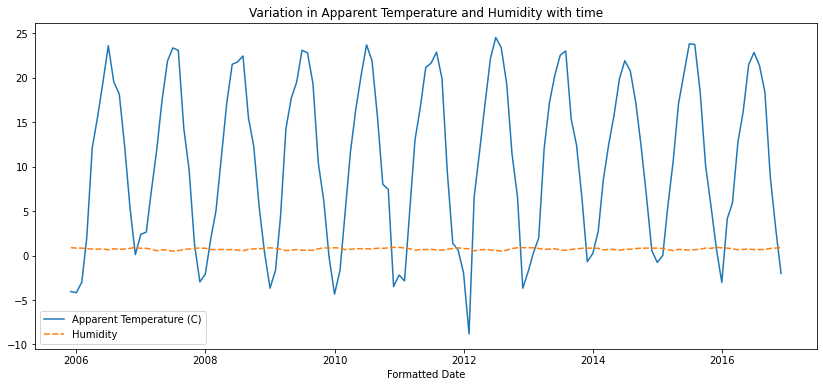

In [58]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=df_mean[data_columns])

From Visualing the above plot we can say that the Apparent Temperature varies over time but its average is almost same as peaks lie on the same line and the Humidity is constant throughout the years

Now let's see the variation of windspeed with time

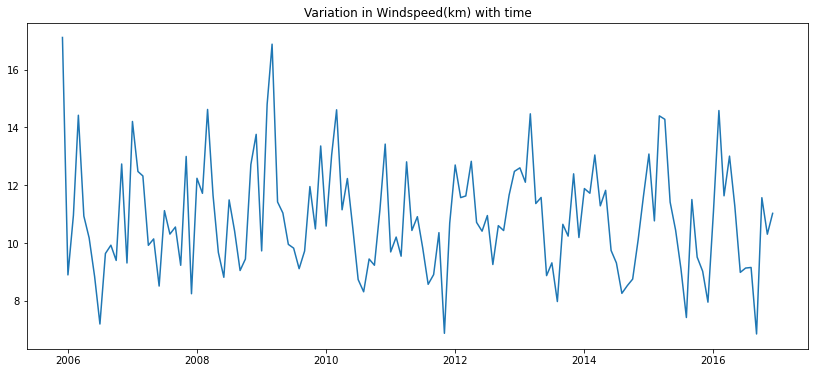

In [45]:

warnings.filterwarnings("ignore")
plt.figure(figsize=(14,6))
plt.title("Variation in Windspeed(km) with time")
sns.lineplot(data=df_mean['Wind Speed (km/h)'])

By seeing this plot we can say that the wind speed has varied a lot with time

Now let's have a look at the variation in pressure with time

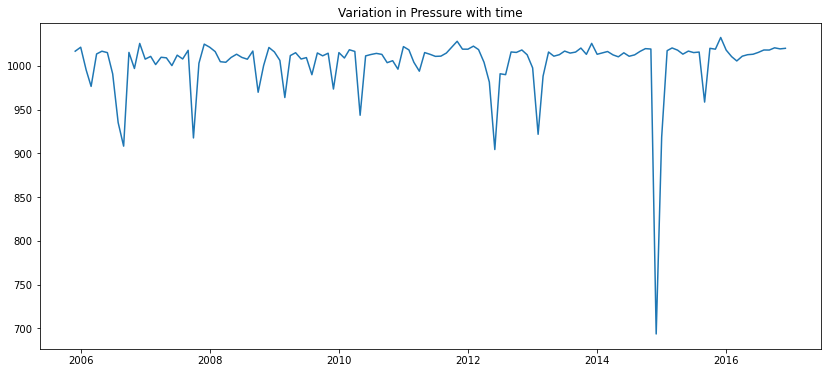

In [46]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(14,6))
plt.title("Variation in Pressure with time")
sns.lineplot(data=df_mean['Pressure (millibars)'])

As you can see from the above plot there is a stiff decline in the pressure(millibar) at the end of the year 2014

Now Let's have a look at the visibility throughout these years

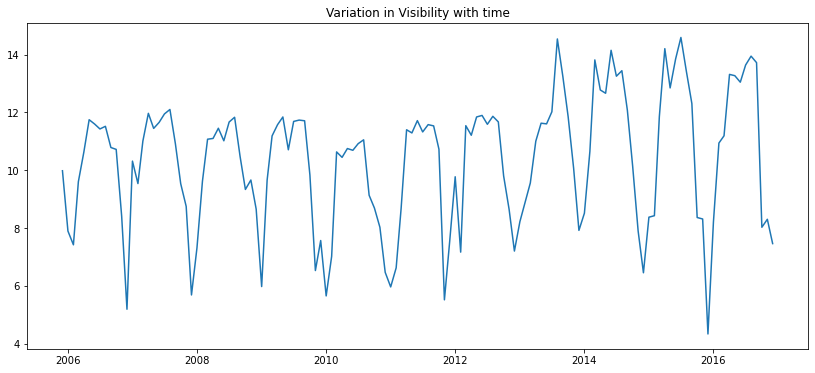

In [47]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(14,6))
plt.title("Variation in Visibility with time")
sns.lineplot(data=df_mean['Visibility (km)'])

As you can see  from the plot that the average visibility till the year end of 2012 is same as the peaks align in the same line but there is an increase in visibility after 2012

Now lets have a look ka the varitaion in wind bearing

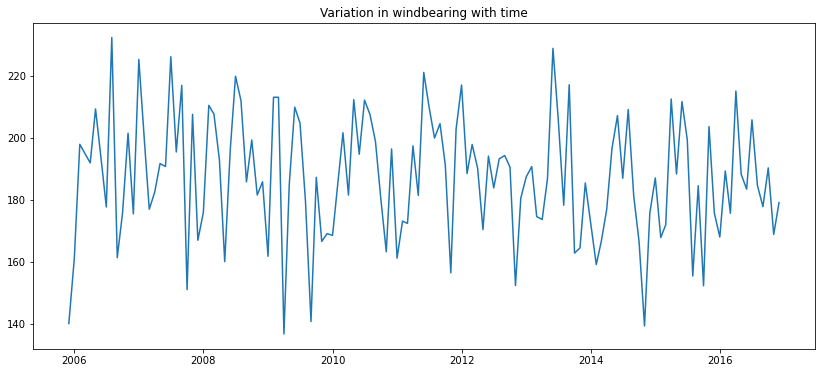

In [52]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(14,6))
plt.title("Variation in windbearing with time")
sns.lineplot(data=df_mean['Wind Bearing (degrees)'])

In [60]:
#Plotting the variation in Apparent Temperature and Humidity for the month of April every year:

df1 = df_mean[df_mean.index.month==4]
print(df1)
df1.dtypes


                           Temperature (C)  Apparent Temperature (C)  \
Formatted Date                                                         
2006-04-01 00:00:00+00:00        12.635031                 12.098827   
2007-04-01 00:00:00+00:00        12.348071                 11.894421   
2008-04-01 00:00:00+00:00        11.804622                 11.183688   
2009-04-01 00:00:00+00:00        14.559159                 14.267076   
2010-04-01 00:00:00+00:00        12.194329                 11.639406   
2011-04-01 00:00:00+00:00        13.378665                 12.978997   
2012-04-01 00:00:00+00:00        12.591088                 11.782770   
2013-04-01 00:00:00+00:00        13.014205                 12.045563   
2014-04-01 00:00:00+00:00        12.978812                 12.486181   
2015-04-01 00:00:00+00:00        11.612160                 10.632801   
2016-04-01 00:00:00+00:00        13.345062                 12.731427   

                           Humidity  Wind Speed (km/h)  \
Forma

Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
dtype: object

Text(0.5, 0, 'Month of April')

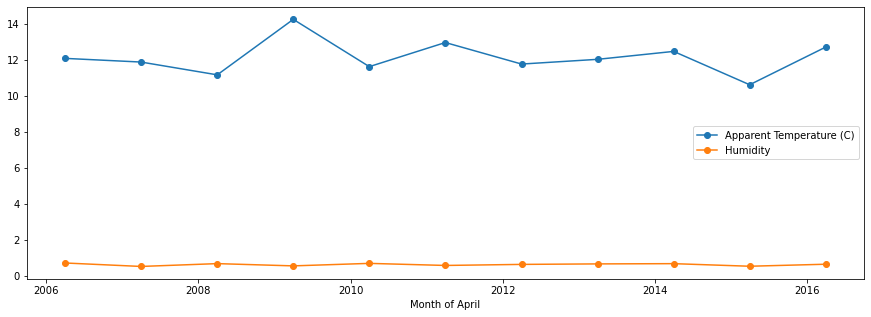

In [70]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)')
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.legend(loc = 'center right')
ax.set_xlabel('Month of April')

Observation : No change in average humidity. Increase in average apparent temperature can be seen in the year 2009 then again it dropped in 2010 then there was a slight increase in 2011 then a significant drop is observed in 2015 and again it increased in 2016 

Now lets have a look at rest of the data in the month of April

Text(0.5, 0, 'Month of April')

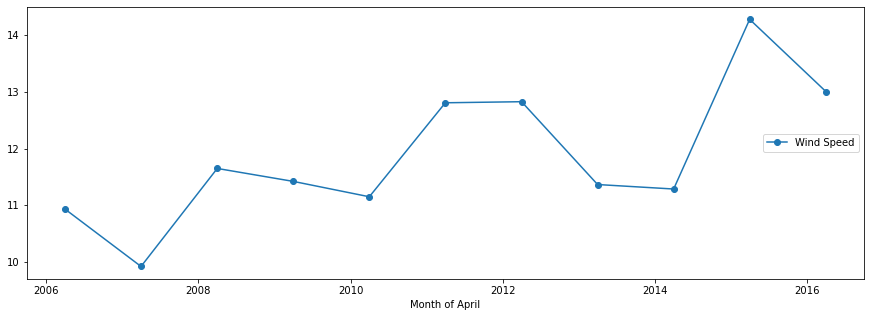

In [75]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Wind Speed (km/h)'], marker='o', linestyle='-',label='Wind Speed')

ax.legend(loc = 'center right')
ax.set_xlabel('Month of April')

The plot of the wind is basically zig-zag but on an avergae we can say that the wind speed has increased in the month of April in the span of 10 years

Text(0.5, 0, 'Month of April')

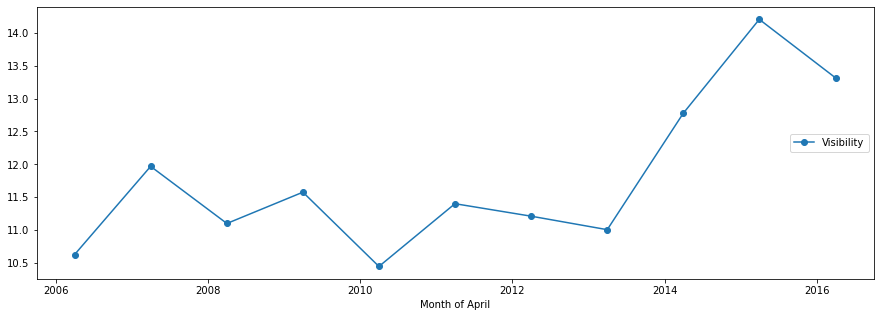

In [72]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Visibility (km)'], marker='o', linestyle='-',label='Visibility')

ax.legend(loc = 'center right')
ax.set_xlabel('Month of April')

The visiblity in the month of April has also increased in these 10 years

Now lets have a look on pressure in the month of April in these 10 years

Text(0.5, 0, 'Month of April')

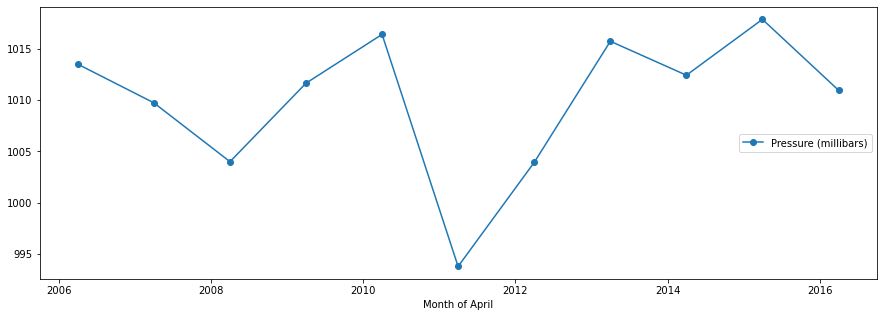

In [73]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Pressure (millibars)'], marker='o', linestyle='-',label='Pressure (millibars)')

ax.legend(loc = 'center right')
ax.set_xlabel('Month of April')

As we can se that there was a significant drop in pressure during April 2011